# Simplest General Adversarial Network

Use a simple GAN to generate images from random noise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Training Data

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
X_train.shape

(60000, 28, 28)

### Extracting just the Zeroes from MNIST

In [34]:
only_zeros = X_train[y_train==0]

We have about 60,000 images.

In [35]:
def plot_image(image):
    plt.imshow(image, cmap="binary");
    plt.axis("off")

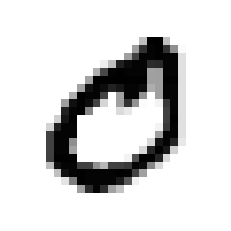

In [36]:
plot_image(only_zeros[1])

## Define the Generator and Discriminator Networks

Train the discriminator using real and fake images. 

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [10]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

In [11]:
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

In [12]:
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


We now do the generator. We use a lower dimensional representation of 100.

In [13]:
codings_size = 100

In [14]:
generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[codings_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28,28]))

In [15]:
GAN = Sequential([generator, discriminator])

In [16]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28)            143634    
                                                                 
 sequential (Sequential)     (None, 1)                 132951    
                                                                 
Total params: 276,585
Trainable params: 143,634
Non-trainable params: 132,951
_________________________________________________________________


## Training the GAN

In [18]:
batch_size = 32
my_data = only_zeros
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size = 1000)
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)

The number of batches is 

In [19]:
len(only_zeros)/32 

185.09375

In [20]:
len(dataset)

185

In [21]:
GAN.layers

In [22]:
GAN.layers[0].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 150)               15150     
                                                                 
 dense_5 (Dense)             (None, 784)               118384    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [23]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [24]:
generator, discriminator = GAN.layers

Generate the labels.

In [25]:
labels = [[0.0]] * batch_size + [[1.0]] * batch_size

In [26]:
len(labels)

64

In [27]:
epochs=50

In [28]:
for epoch in range(epochs):
    i = 0

    print("Epoch:", epoch, "")

    for X_batch in dataset:    
        i = i + 1
        
        noise = tf.random.normal(shape = [batch_size, codings_size])
        gen_images = generator(noise)        
        X_batch_32 = tf.dtypes.cast(X_batch, tf.float32)
        X_fake_vs_real = tf.concat([gen_images, X_batch_32], axis=0)        
        y1 = tf.constant(labels)
        discriminator.trainable = True
        discriminator.train_on_batch(X_fake_vs_real, y1)
                
        noise = tf.random.normal(shape = [batch_size, codings_size])        
        y2 = tf.constant([1.0] * batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise, y2)

Epoch: 0 
Epoch: 1 
Epoch: 2 
Epoch: 3 
Epoch: 4 
Epoch: 5 
Epoch: 6 
Epoch: 7 
Epoch: 8 
Epoch: 9 
Epoch: 10 
Epoch: 11 
Epoch: 12 
Epoch: 13 
Epoch: 14 
Epoch: 15 
Epoch: 16 
Epoch: 17 
Epoch: 18 
Epoch: 19 
Epoch: 20 
Epoch: 21 
Epoch: 22 
Epoch: 23 
Epoch: 24 
Epoch: 25 
Epoch: 26 
Epoch: 27 
Epoch: 28 
Epoch: 29 
Epoch: 30 
Epoch: 31 
Epoch: 32 
Epoch: 33 
Epoch: 34 
Epoch: 35 
Epoch: 36 
Epoch: 37 
Epoch: 38 
Epoch: 39 
Epoch: 40 
Epoch: 41 
Epoch: 42 
Epoch: 43 
Epoch: 44 
Epoch: 45 
Epoch: 46 
Epoch: 47 
Epoch: 48 
Epoch: 49 


In [37]:
noise = tf.random.normal(shape = [10, codings_size])        

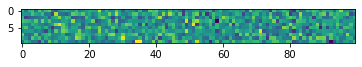

In [38]:
plt.imshow(noise);

In [39]:
images = generator(noise)

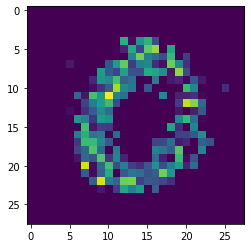

In [40]:
plt.imshow(images[2]);
plt.show()

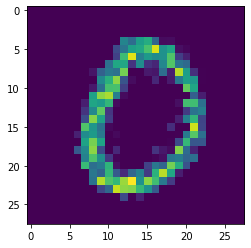

In [41]:
plt.imshow(images[1])